<a href="https://colab.research.google.com/github/hiro-57/house-price-analysis/blob/main/house_price_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
dir_path="/content/drive/MyDrive/python-for-biginner/house-prices-advanced-regression-techniques/"
train_df=pd.read_csv(dir_path+"train.csv")
test_df=pd.read_csv(dir_path+"test.csv")
#目的住宅価格の予測

In [ ]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

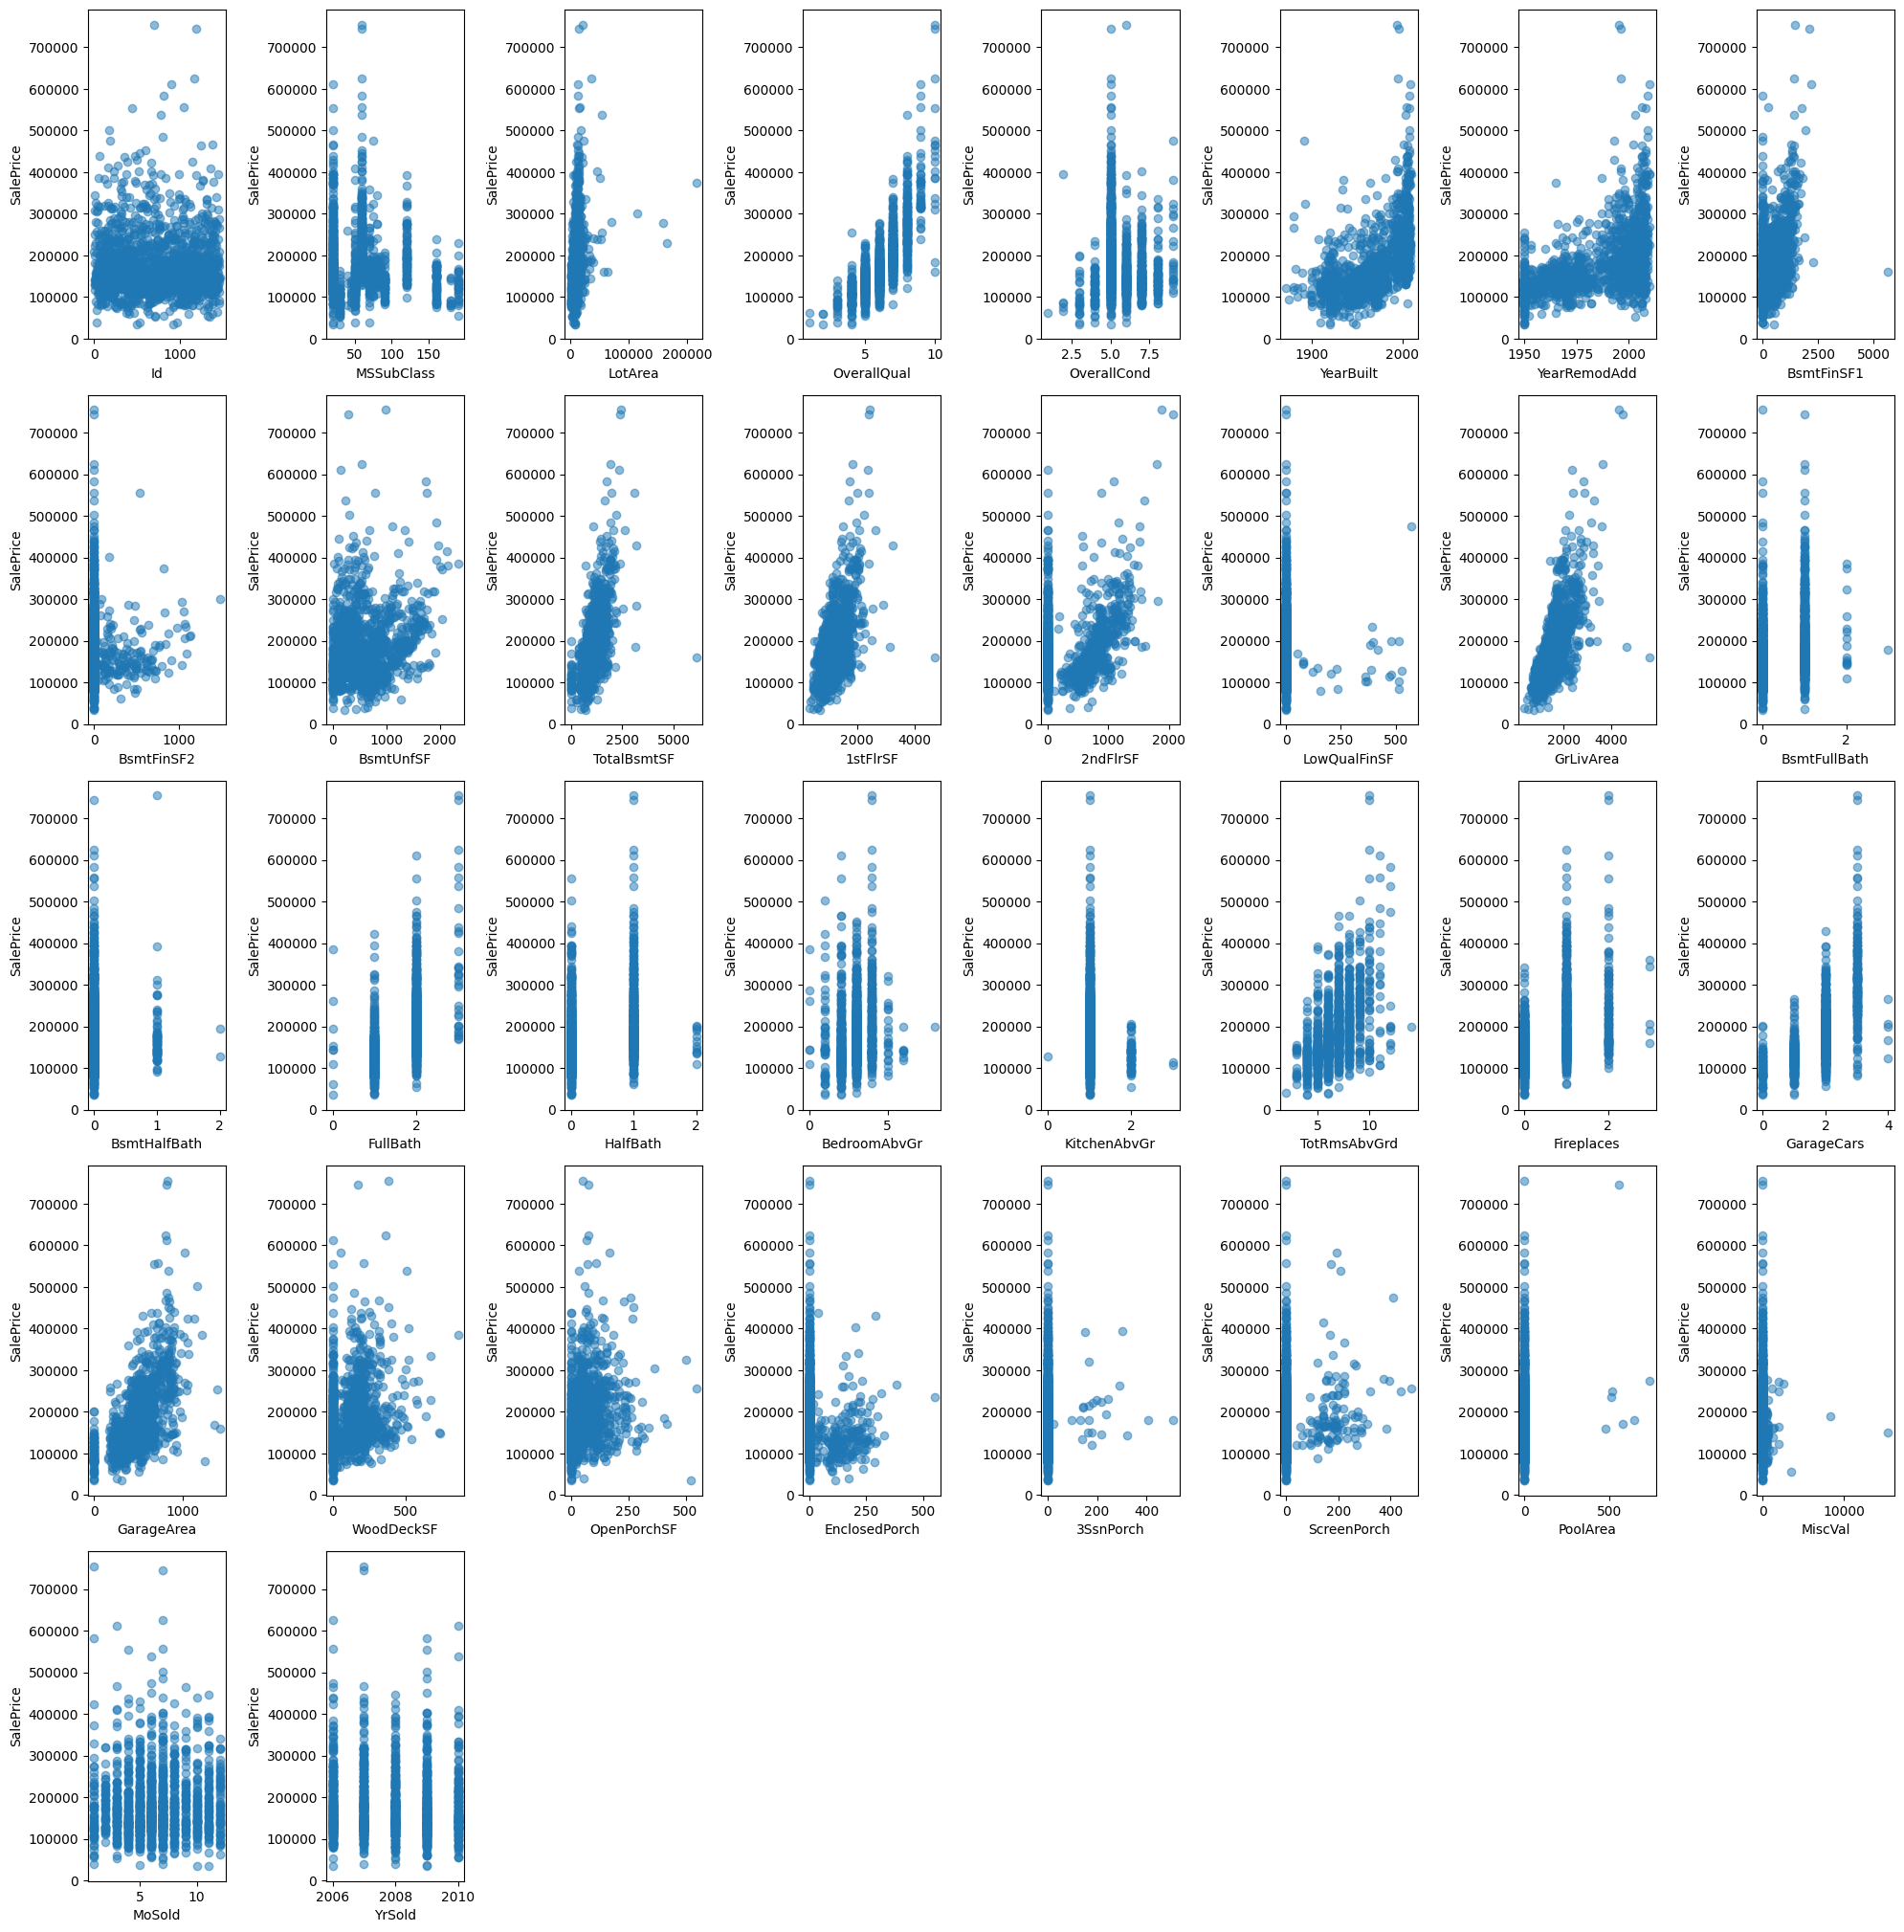

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 数値型で欠損がないカラムを抽出
numeric_cols = train_df.select_dtypes(include=['int64', 'float64']).columns
no_missing_cols = [col for col in numeric_cols if train_df[col].isnull().sum() == 0 and col != 'SalePrice']

# 可視化（最大80個まで）
features = no_missing_cols[:80]  # 多すぎると図が小さくなるので制限
plt.figure(figsize=(20, 40))  # サイズ大きめ

for i, col in enumerate(features):
    plt.subplot(10, 8, i + 1)
    plt.scatter(train_df[col], train_df['SalePrice'], alpha=0.5)
    plt.xlabel(col)
    plt.ylabel('SalePrice')

plt.tight_layout()
plt.show()


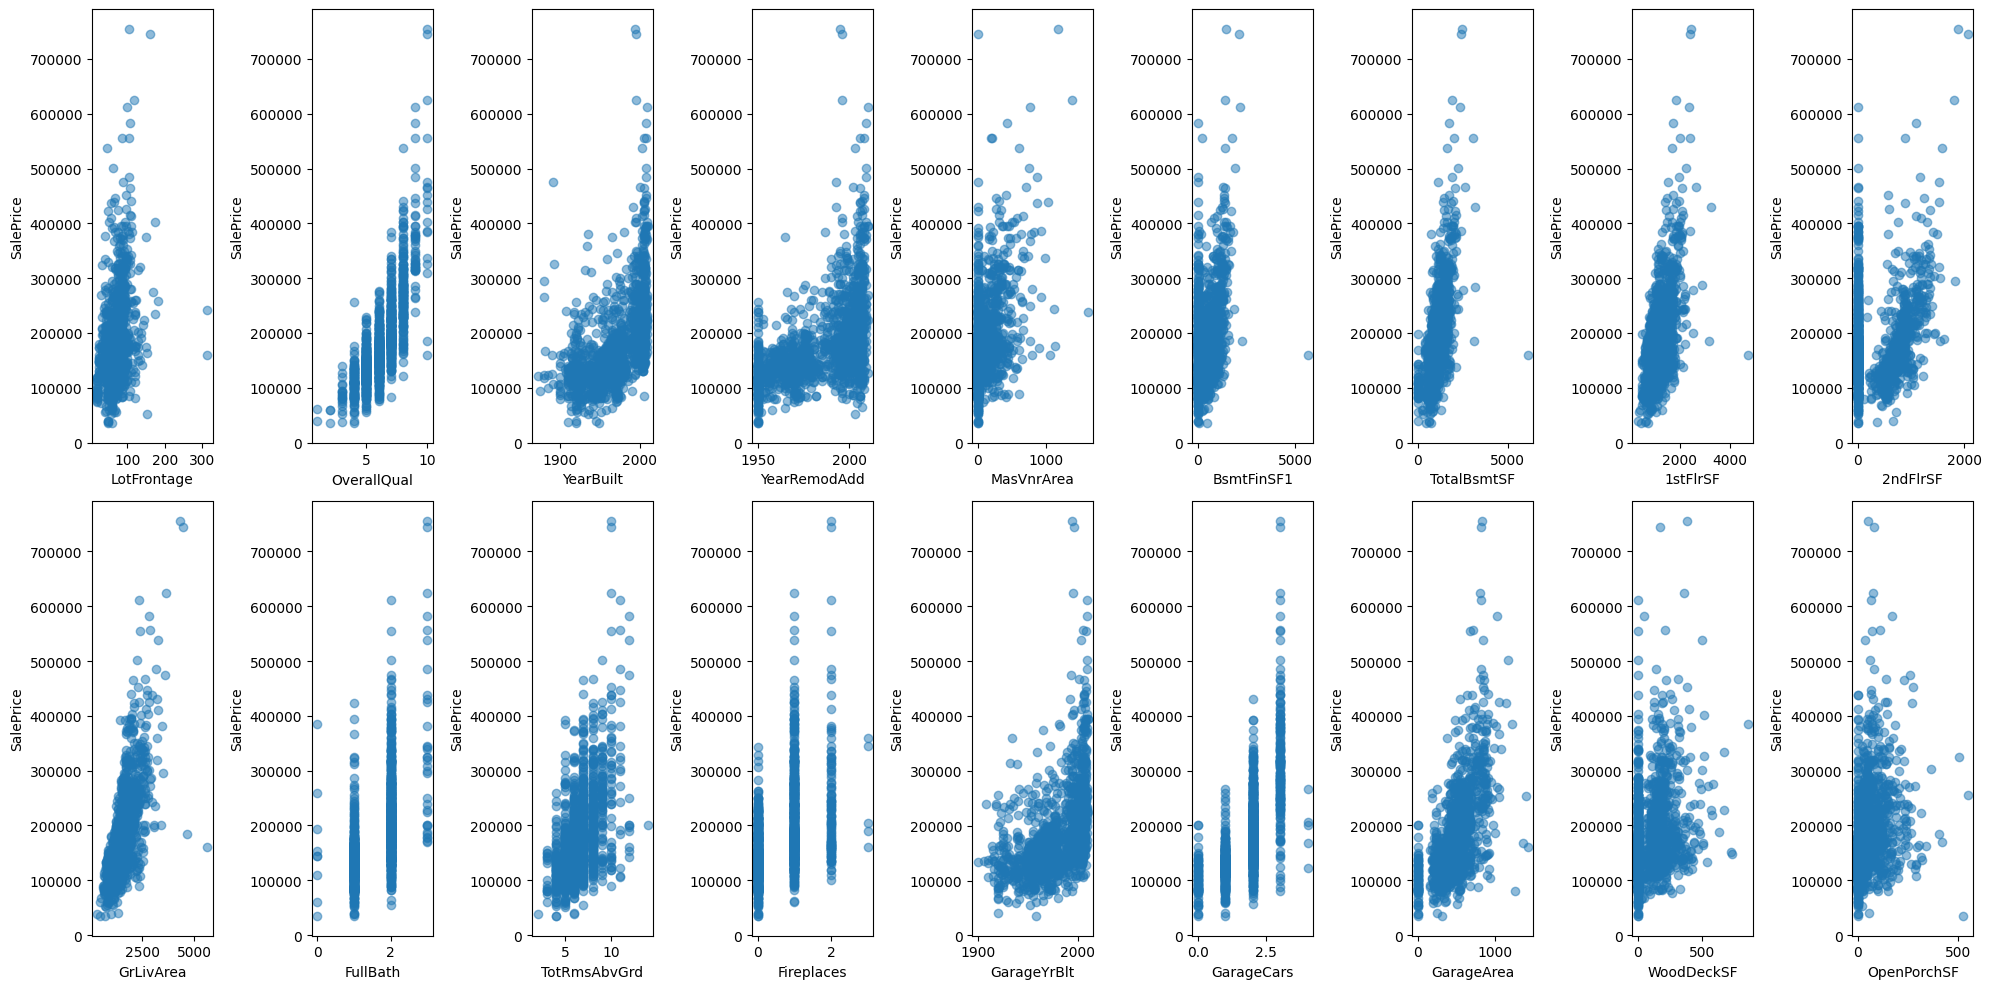

In [ ]:
# ① 数値型だけを抽出（相関分析や散布図はこれでOK）
numeric_df = train_df.select_dtypes(include=['int64', 'float64'])

# ② SalePriceとの相関を確認
corr_series = numeric_df.corr()['SalePrice'].drop('SalePrice')

# ③ 相関が高いカラムだけ取得
high_corr_cols = corr_series[abs(corr_series) >= 0.3].index.tolist()

# ④ 可視化
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))

for i, col in enumerate(high_corr_cols):
    plt.subplot(2, (len(high_corr_cols) + 1) // 2, i + 1)
    plt.scatter(train_df[col], train_df['SalePrice'], alpha=0.5)
    plt.xlabel(col)
    plt.ylabel('SalePrice')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# ---------------------------
# データの準備
# ---------------------------
features_list = [
    ['GrLivArea'],
    ['GrLivArea', 'OverallQual'],
    ['GrLivArea', 'OverallQual', 'TotalBsmtSF']
]

print("🔍 各モデルのRMSE（テストデータで評価）")
print("-" * 40)

for i, features in enumerate(features_list, 1):
    # 特徴量と目的変数の準備
    X = train_df[features]
    y = train_df['SalePrice']

    # 訓練／検証データに分割（8:2）
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

    # 線形回帰モデルで学習
    model = LinearRegression()
    model.fit(X_train, y_train)

    # 検証データで予測
    y_pred = model.predict(X_valid)

    # RMSEの計算
    rmse = np.sqrt(mean_squared_error(y_valid, y_pred))

    print(f"モデル{i}: 特徴量={features} → RMSE = {rmse:.2f}")


🔍 各モデルのRMSE（テストデータで評価）
----------------------------------------
モデル1: 特徴量=['GrLivArea'] → RMSE = 58471.76
モデル2: 特徴量=['GrLivArea', 'OverallQual'] → RMSE = 44159.60
モデル3: 特徴量=['GrLivArea', 'OverallQual', 'TotalBsmtSF'] → RMSE = 40836.96


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# ---------------------------
# データの準備
# ---------------------------
features_list = [
    ['GrLivArea'],
    ['GrLivArea', 'OverallQual'],
    ['GrLivArea', 'OverallQual', 'TotalBsmtSF'],
    ['GrLivArea', 'OverallQual', 'TotalBsmtSF','1stFlrSF'],
    ['GrLivArea', 'OverallQual', 'TotalBsmtSF','1stFlrSF','YearBuilt'],
    ['GrLivArea', 'OverallQual', 'TotalBsmtSF','1stFlrSF','YearBuilt','GarageCars',],
    ['GrLivArea', 'OverallQual', 'TotalBsmtSF','1stFlrSF','YearBuilt','GarageCars','FullBath',],
    ['GrLivArea', 'OverallQual', 'TotalBsmtSF','1stFlrSF','YearBuilt','GarageCars','FullBath','TotRmsAbvGrd']
]

print("🔍 各モデルのRMSE（テストデータで評価）")
print("-" * 40)

for i, features in enumerate(features_list, 1):
    # 特徴量と目的変数の準備
    X = train_df[features]
    y = train_df['SalePrice']

    # 訓練／検証データに分割（8:2）
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

    # 線形回帰モデルで学習
    model = LinearRegression()
    model.fit(X_train, y_train)

    # 検証データで予測
    y_pred = model.predict(X_valid)

    # RMSEの計算
    rmse = np.sqrt(mean_squared_error(y_valid, y_pred))

    print(f"モデル{i}: 特徴量={features} → RMSE = {rmse:.2f}")


🔍 各モデルのRMSE（テストデータで評価）
----------------------------------------
モデル1: 特徴量=['GrLivArea'] → RMSE = 58471.76
モデル2: 特徴量=['GrLivArea', 'OverallQual'] → RMSE = 44159.60
モデル3: 特徴量=['GrLivArea', 'OverallQual', 'TotalBsmtSF'] → RMSE = 40836.96
モデル4: 特徴量=['GrLivArea', 'OverallQual', 'TotalBsmtSF', '1stFlrSF'] → RMSE = 40642.00
モデル5: 特徴量=['GrLivArea', 'OverallQual', 'TotalBsmtSF', '1stFlrSF', 'YearBuilt'] → RMSE = 40093.97
モデル6: 特徴量=['GrLivArea', 'OverallQual', 'TotalBsmtSF', '1stFlrSF', 'YearBuilt', 'GarageCars'] → RMSE = 39666.13
モデル7: 特徴量=['GrLivArea', 'OverallQual', 'TotalBsmtSF', '1stFlrSF', 'YearBuilt', 'GarageCars', 'FullBath'] → RMSE = 39602.63
モデル8: 特徴量=['GrLivArea', 'OverallQual', 'TotalBsmtSF', '1stFlrSF', 'YearBuilt', 'GarageCars', 'FullBath', 'TotRmsAbvGrd'] → RMSE = 39608.48


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21508 (\N{CJK UNIFIED IDEOGRAPH-5404}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24500 (\N{CJK UNIFIED IDEOGRAPH-5FB4}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_f

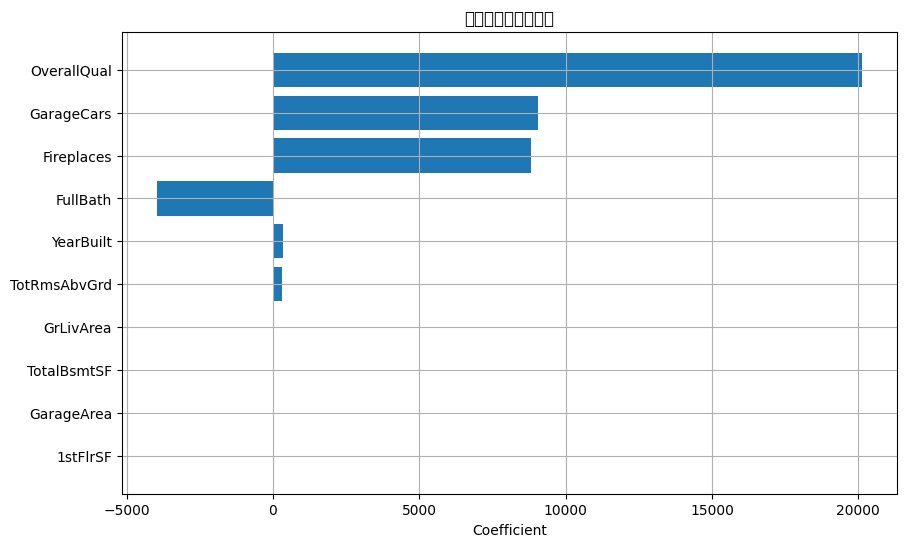

In [ ]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 使いたいすべての特徴量（仮に以下の10個）
features = ['GrLivArea', 'OverallQual', 'TotalBsmtSF', '1stFlrSF',
            'YearBuilt', 'GarageCars', 'GarageArea', 'FullBath',
            'TotRmsAbvGrd', 'Fireplaces']

X = train_df[features]
y = train_df['SalePrice']

model = LinearRegression()
model.fit(X, y)

# 係数の絶対値が大きい順にソートして可視化
coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_,
    'Abs_Coefficient': np.abs(model.coef_)
}).sort_values(by='Abs_Coefficient', ascending=False)

# グラフ表示
plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'])
plt.title("各特徴量の回帰係数")
plt.xlabel("Coefficient")
plt.grid(True)
plt.gca().invert_yaxis()
plt.show()

# 表でも表示（必要であれば）
#import ace_tools as tools; tools.display_dataframe_to_user(name="特徴量の重要度（線形回帰）", dataframe=coef_df)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# ---------------------------
# データの準備
# ---------------------------
features_list = [
    ['GrLivArea'],
    ['GrLivArea', 'OverallQual'],
    ['GrLivArea', 'OverallQual', 'TotalBsmtSF'],
    ['GrLivArea', 'OverallQual', 'TotalBsmtSF','1stFlrSF'],
    ['GrLivArea', 'OverallQual', 'TotalBsmtSF','1stFlrSF','YearBuilt'],
    ['OverallQual','GarageCars','Fireplaces','GrLivArea'],

]

print("🔍 各モデルのRMSE（テストデータで評価）")
print("-" * 40)

for i, features in enumerate(features_list, 1):
    # 特徴量と目的変数の準備
    X = train_df[features]
    y = train_df['SalePrice']

    # 訓練／検証データに分割（8:2）
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

    # 線形回帰モデルで学習
    model = LinearRegression()
    model.fit(X_train, y_train)

    # 検証データで予測
    y_pred = model.predict(X_valid)

    # RMSEの計算
    rmse = np.sqrt(mean_squared_error(y_valid, y_pred))

    print(f"モデル{i}: 特徴量={features} → RMSE = {rmse:.2f}")


🔍 各モデルのRMSE（テストデータで評価）
----------------------------------------
モデル1: 特徴量=['GrLivArea'] → RMSE = 58471.76
モデル2: 特徴量=['GrLivArea', 'OverallQual'] → RMSE = 44159.60
モデル3: 特徴量=['GrLivArea', 'OverallQual', 'TotalBsmtSF'] → RMSE = 40836.96
モデル4: 特徴量=['GrLivArea', 'OverallQual', 'TotalBsmtSF', '1stFlrSF'] → RMSE = 40642.00
モデル5: 特徴量=['GrLivArea', 'OverallQual', 'TotalBsmtSF', '1stFlrSF', 'YearBuilt'] → RMSE = 40093.97
モデル6: 特徴量=['OverallQual', 'GarageCars', 'Fireplaces', 'GrLivArea'] → RMSE = 42691.45


In [ ]:
!pip install -U scikit-learn


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27161 (\N{CJK UNIFIED IDEOGRAPH-6A19}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28310 (\N{CJK UNIFIED IDEOGRAPH-6E96}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21270 (\N{CJK UNIFIED IDEOGRAPH-5316}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24460 (\N{CJK UNIFIED IDEOGRAPH-5F8C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_f

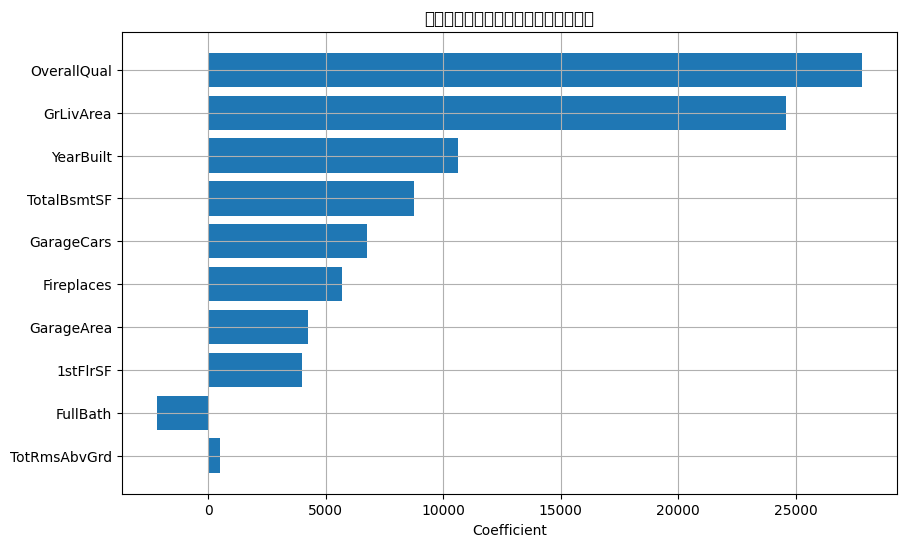

,Feature,Coefficient,Abs_Coefficient
1,OverallQual,27811.596034,27811.596034
0,GrLivArea,24587.344550,24587.344550
4,YearBuilt,10611.841942,10611.841942
2,TotalBsmtSF,8773.473112,8773.473112
5,GarageCars,6770.688148,6770.688148
9,Fireplaces,5692.930872,5692.930872
6,GarageArea,4240.468010,4240.468010
3,1stFlrSF,4002.740478,4002.740478
7,FullBath,-2181.559446,2181.559446
8,TotRmsAbvGrd,510.311317,510.311317


In [ ]:
from sklearn.preprocessing import StandardScaler

# 特徴量リスト（必要に応じて調整可能）
features = ['GrLivArea', 'OverallQual', 'TotalBsmtSF', '1stFlrSF',
            'YearBuilt', 'GarageCars', 'GarageArea', 'FullBath',
            'TotRmsAbvGrd', 'Fireplaces']

# 入力・出力
X = train_df[features]
y = train_df['SalePrice']

# 標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 線形回帰モデル
model = LinearRegression()
model.fit(X_scaled, y)

# 係数をDataFrame化
coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_,
    'Abs_Coefficient': np.abs(model.coef_)
}).sort_values(by='Abs_Coefficient', ascending=False)

# 棒グラフ表示
plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'])
plt.title("標準化後の回帰係数（重要度の比較）")
plt.xlabel("Coefficient")
plt.grid(True)
plt.gca().invert_yaxis()
plt.show()

# 表でも確認
display(coef_df)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# ---------------------------
# データの準備
# ---------------------------
features_list = [
    ['GrLivArea'],
    ['GrLivArea', 'OverallQual'],
    ['GrLivArea', 'OverallQual', 'TotalBsmtSF'],
    ['GrLivArea', 'OverallQual', 'TotalBsmtSF','1stFlrSF'],
    ['GrLivArea', 'OverallQual', 'TotalBsmtSF','1stFlrSF','YearBuilt'],
    ['OverallQual','GarageCars','Fireplaces','GrLivArea'],
    ['GrLivArea', 'OverallQual', 'TotalBsmtSF', '1stFlrSF',
     'YearBuilt', 'GarageCars', 'GarageArea','Fireplaces'],
    ['GrLivArea', 'OverallQual', 'TotalBsmtSF', '1stFlrSF',
     'YearBuilt', 'GarageArea','Fireplaces']
]

print("🔍 各モデルのRMSE（テストデータで評価）")
print("-" * 40)

for i, features in enumerate(features_list, 1):
    # 特徴量と目的変数の準備
    X = train_df[features]
    y = train_df['SalePrice']

    # 訓練／検証データに分割（8:2）
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

    # 線形回帰モデルで学習
    model = LinearRegression()
    model.fit(X_train, y_train)

    # 検証データで予測
    y_pred = model.predict(X_valid)

    # RMSEの計算
    rmse = np.sqrt(mean_squared_error(y_valid, y_pred))

    print(f"モデル{i}: 特徴量={features} → RMSE = {rmse:.2f}")


🔍 各モデルのRMSE（テストデータで評価）
----------------------------------------
モデル1: 特徴量=['GrLivArea'] → RMSE = 58471.76
モデル2: 特徴量=['GrLivArea', 'OverallQual'] → RMSE = 44159.60
モデル3: 特徴量=['GrLivArea', 'OverallQual', 'TotalBsmtSF'] → RMSE = 40836.96
モデル4: 特徴量=['GrLivArea', 'OverallQual', 'TotalBsmtSF', '1stFlrSF'] → RMSE = 40642.00
モデル5: 特徴量=['GrLivArea', 'OverallQual', 'TotalBsmtSF', '1stFlrSF', 'YearBuilt'] → RMSE = 40093.97
モデル6: 特徴量=['OverallQual', 'GarageCars', 'Fireplaces', 'GrLivArea'] → RMSE = 42691.45
モデル7: 特徴量=['GrLivArea', 'OverallQual', 'TotalBsmtSF', '1stFlrSF', 'YearBuilt', 'GarageCars', 'GarageArea', 'Fireplaces'] → RMSE = 39424.97
モデル8: 特徴量=['GrLivArea', 'OverallQual', 'TotalBsmtSF', '1stFlrSF', 'YearBuilt', 'GarageArea', 'Fireplaces'] → RMSE = 39396.64


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# モデル7の全特徴量
base_features = [
    'GrLivArea', 'OverallQual', 'TotalBsmtSF',
    '1stFlrSF', 'YearBuilt', 'GarageCars',
    'GarageArea', 'Fireplaces'
]

print("🔍 モデル7の特徴量から1つずつ削除してRMSEを比較")
print("-" * 50)

# 基準RMSE（全部入り）
X_base = train_df[base_features]
y_base = train_df['SalePrice']
X_train_base, X_valid_base, y_train_base, y_valid_base = train_test_split(X_base, y_base, test_size=0.2, random_state=42)
model_base = LinearRegression()
model_base.fit(X_train_base, y_train_base)
y_pred_base = model_base.predict(X_valid_base)
rmse_base = np.sqrt(mean_squared_error(y_valid_base, y_pred_base))
print(f"基準モデル（全特徴量）→ RMSE = {rmse_base:.2f}")

# 1つずつ除外して比較
for feature_to_drop in base_features:
    selected_features = [f for f in base_features if f != feature_to_drop]

    X = train_df[selected_features]
    y = train_df['SalePrice']
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_valid)
    rmse = np.sqrt(mean_squared_error(y_valid, y_pred))

    print(f"❌ 除外: {feature_to_drop} → RMSE = {rmse:.2f}")


🔍 モデル7の特徴量から1つずつ削除してRMSEを比較
--------------------------------------------------
基準モデル（全特徴量）→ RMSE = 39424.97
❌ 除外: GrLivArea → RMSE = 43903.09
❌ 除外: OverallQual → RMSE = 42838.86
❌ 除外: TotalBsmtSF → RMSE = 40109.11
❌ 除外: 1stFlrSF → RMSE = 39484.28
❌ 除外: YearBuilt → RMSE = 39772.64
❌ 除外: GarageCars → RMSE = 39396.64
❌ 除外: GarageArea → RMSE = 39506.09
❌ 除外: Fireplaces → RMSE = 39610.44


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# ---------------------------
# データの準備
# ---------------------------
features_list = [
    ['GrLivArea'],
    ['GrLivArea', 'OverallQual'],
    ['GrLivArea', 'OverallQual', 'TotalBsmtSF'],
    ['GrLivArea', 'OverallQual', 'TotalBsmtSF','1stFlrSF'],
    ['GrLivArea', 'OverallQual', 'TotalBsmtSF','1stFlrSF','YearBuilt'],
    ['OverallQual','GarageCars','Fireplaces','GrLivArea'],
    ['GrLivArea', 'OverallQual', 'TotalBsmtSF', '1stFlrSF',
     'YearBuilt', 'GarageCars', 'GarageArea','Fireplaces'],
    ['GrLivArea', 'OverallQual', 'TotalBsmtSF', '1stFlrSF',
     'YearBuilt', 'GarageArea','Fireplaces'],
      ['GrLivArea', 'OverallQual', 'TotalBsmtSF',
     'YearBuilt', 'GarageArea','Fireplaces']
]

print("🔍 各モデルのRMSE（テストデータで評価）")
print("-" * 40)

for i, features in enumerate(features_list, 1):
    # 特徴量と目的変数の準備
    X = train_df[features]
    y = train_df['SalePrice']

    # 訓練／検証データに分割（8:2）
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

    # 線形回帰モデルで学習
    model = LinearRegression()
    model.fit(X_train, y_train)

    # 検証データで予測
    y_pred = model.predict(X_valid)

    # RMSEの計算
    rmse = np.sqrt(mean_squared_error(y_valid, y_pred))

    print(f"モデル{i}: 特徴量={features} → RMSE = {rmse:.2f}")


🔍 各モデルのRMSE（テストデータで評価）
----------------------------------------
モデル1: 特徴量=['GrLivArea'] → RMSE = 58471.76
モデル2: 特徴量=['GrLivArea', 'OverallQual'] → RMSE = 44159.60
モデル3: 特徴量=['GrLivArea', 'OverallQual', 'TotalBsmtSF'] → RMSE = 40836.96
モデル4: 特徴量=['GrLivArea', 'OverallQual', 'TotalBsmtSF', '1stFlrSF'] → RMSE = 40642.00
モデル5: 特徴量=['GrLivArea', 'OverallQual', 'TotalBsmtSF', '1stFlrSF', 'YearBuilt'] → RMSE = 40093.97
モデル6: 特徴量=['OverallQual', 'GarageCars', 'Fireplaces', 'GrLivArea'] → RMSE = 42691.45
モデル7: 特徴量=['GrLivArea', 'OverallQual', 'TotalBsmtSF', '1stFlrSF', 'YearBuilt', 'GarageCars', 'GarageArea', 'Fireplaces'] → RMSE = 39424.97
モデル8: 特徴量=['GrLivArea', 'OverallQual', 'TotalBsmtSF', '1stFlrSF', 'YearBuilt', 'GarageArea', 'Fireplaces'] → RMSE = 39396.64
モデル9: 特徴量=['GrLivArea', 'OverallQual', 'TotalBsmtSF', 'YearBuilt', 'GarageArea', 'Fireplaces'] → RMSE = 39451.32


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# 特徴量と目的変数
features = ['GrLivArea', 'OverallQual', 'TotalBsmtSF', '1stFlrSF', 'YearBuilt', 'GarageArea', 'Fireplaces']
X = train_df[features]
y = train_df['SalePrice']

# データ分割
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# ランダムフォレストで学習
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# 予測と評価
y_pred = model.predict(X_valid)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))

print(f"📊 RandomForest RMSE: {rmse:.2f}")


📊 RandomForest RMSE: 29825.44


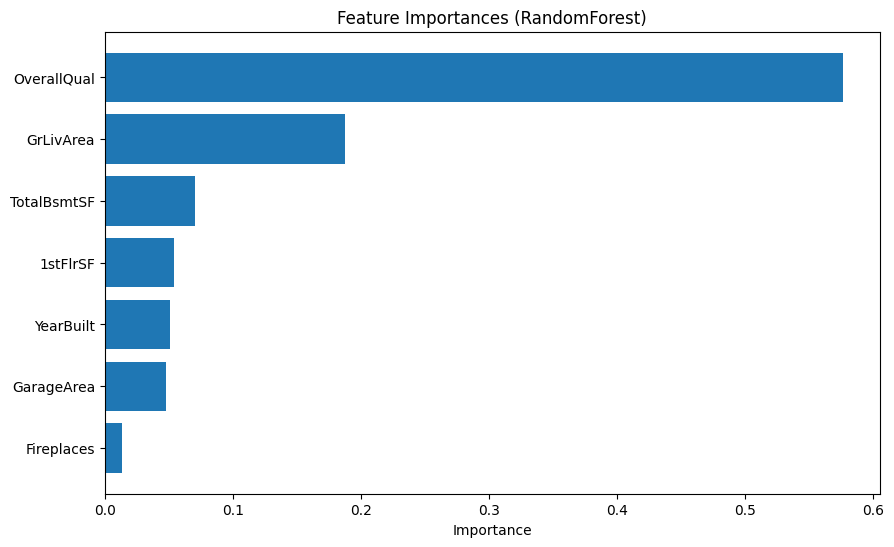

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 特徴量の重要度を可視化
importances = model.feature_importances_
feature_names = X.columns

# データフレーム化して並べ替え
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# グラフ表示
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.title("Feature Importances (RandomForest)")
plt.show()


📊 RandomForest（全特徴量）RMSE: 29354.35


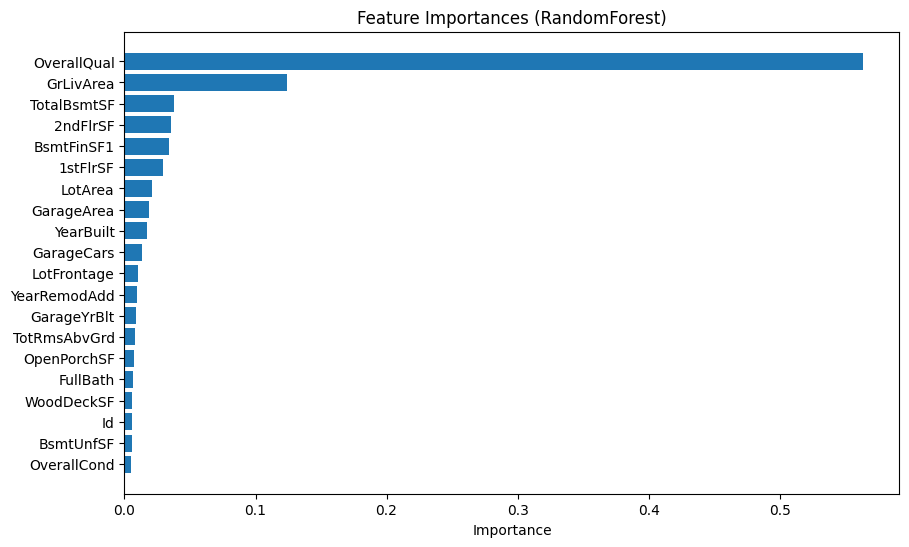

In [ ]:
# 必要なライブラリ
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# -------------------------------
# Step 1: 数値特徴量のみ抽出
# -------------------------------
# SalePriceは目的変数なので除外せず保持
numeric_df = train_df.select_dtypes(include=[np.number])

# 欠損値の処理（単純に平均で埋める）
numeric_df = numeric_df.fillna(numeric_df.mean())

# -------------------------------
# Step 2: 特徴量・目的変数の分割
# -------------------------------
X = numeric_df.drop("SalePrice", axis=1)
y = numeric_df["SalePrice"]

# -------------------------------
# Step 3: 訓練・検証データに分割
# -------------------------------
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# -------------------------------
# Step 4: モデル学習・予測
# -------------------------------
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_valid)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))

print(f"📊 RandomForest（全特徴量）RMSE: {rmse:.2f}")

# -------------------------------
# Step 5: 重要度の可視化
# -------------------------------
importances = model.feature_importances_
importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# 可視化（上位20個）
plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"].head(20)[::-1], importance_df["Importance"].head(20)[::-1])
plt.xlabel("Importance")
plt.title("Feature Importances (RandomForest)")
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

# -----------------------------
# 特徴量（ユーザーが分析に使っていた重要変数たち）
# -----------------------------
features = [
    'OverallQual', 'GrLivArea', 'TotalBsmtSF', '2ndFlrSF', 'BsmtFinSF1',
    '1stFlrSF', 'LotArea', 'GarageArea', 'YearBuilt', 'GarageCars',
    'LotFrontage', 'YearRemodAdd', 'GarageYrBlt', 'TotRmsAbvGrd',
    'OpenPorchSF', 'FullBath', 'WoodDeckSF', 'BsmtUnfSF', 'OverallCond'
]

# -----------------------------
# 特徴量・目的変数の分割
# -----------------------------
X = train_df[features]
y = train_df['SalePrice']

# -----------------------------
# 学習／検証用に分割
# -----------------------------
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# -----------------------------
# 基準モデル（全特徴量）
# -----------------------------
base_model = RandomForestRegressor(random_state=42)
base_model.fit(X_train, y_train)
y_pred_base = base_model.predict(X_valid)
rmse_base = np.sqrt(mean_squared_error(y_valid, y_pred_base))

print("🔍 アブレーション分析（特徴量を1つずつ削除）")
print("------------------------------------------------")
print(f"基準モデル（全特徴量）→ RMSE = {rmse_base:.2f}")

# -----------------------------
# 1つずつ除外して比較
# -----------------------------
for col in features:
    reduced_features = [f for f in features if f != col]

    # ❌ train_df から取っていたのを修正 ✅
    X_train_red = X_train[reduced_features]
    X_valid_red = X_valid[reduced_features]

    model = RandomForestRegressor(random_state=42)
    model.fit(X_train_red, y_train)
    y_pred = model.predict(X_valid_red)
    rmse = np.sqrt(mean_squared_error(y_valid, y_pred))

    change = "❌" if rmse > rmse_base else "✅"
    print(f"{change} 除外: {col:15} → RMSE = {rmse:.2f}")


🔍 アブレーション分析（特徴量を1つずつ削除）
------------------------------------------------
基準モデル（全特徴量）→ RMSE = 28611.72
❌ 除外: OverallQual     → RMSE = 30029.84
❌ 除外: GrLivArea       → RMSE = 29275.62
❌ 除外: TotalBsmtSF     → RMSE = 29181.56
❌ 除外: 2ndFlrSF        → RMSE = 30235.47
❌ 除外: BsmtFinSF1      → RMSE = 28624.42
✅ 除外: 1stFlrSF        → RMSE = 28556.22
❌ 除外: LotArea         → RMSE = 28844.71
✅ 除外: GarageArea      → RMSE = 28503.47
❌ 除外: YearBuilt       → RMSE = 29300.81
❌ 除外: GarageCars      → RMSE = 28820.63
❌ 除外: LotFrontage     → RMSE = 28683.49
❌ 除外: YearRemodAdd    → RMSE = 28877.30
❌ 除外: GarageYrBlt     → RMSE = 28725.91
❌ 除外: TotRmsAbvGrd    → RMSE = 29240.85
✅ 除外: OpenPorchSF     → RMSE = 28414.91
❌ 除外: FullBath        → RMSE = 28624.08
✅ 除外: WoodDeckSF      → RMSE = 28430.94
❌ 除外: BsmtUnfSF       → RMSE = 28983.21
❌ 除外: OverallCond     → RMSE = 29145.09


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# 特徴量リスト（重要度低く、除外すべき4変数を外した）
selected_features = [
    'OverallQual', 'GrLivArea', 'TotalBsmtSF', '2ndFlrSF', 'BsmtFinSF1',
    'LotArea', 'YearBuilt', 'GarageCars', 'LotFrontage', 'YearRemodAdd',
    'GarageYrBlt', 'TotRmsAbvGrd', 'FullBath', 'BsmtUnfSF', 'OverallCond'
]

# 特徴量と目的変数を定義
X = train_df[selected_features]
y = train_df['SalePrice']

# 学習・検証データに分割
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# モデル構築
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# 予測 & 評価
y_pred = model.predict(X_valid)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))

print(f"🔍 最終モデル（4変数除外）→ RMSE = {rmse:.2f}")


🔍 最終モデル（4変数除外）→ RMSE = 27822.81


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# 現在の変数リスト（4変数除外済みの14変数）
base_features = [
    'OverallQual', 'GrLivArea', 'TotalBsmtSF', '2ndFlrSF', 'BsmtFinSF1',
    'LotArea', 'YearBuilt', 'GarageCars', 'LotFrontage', 'YearRemodAdd',
    'GarageYrBlt', 'TotRmsAbvGrd', 'FullBath', 'BsmtUnfSF', 'OverallCond'
]

# 14変数に戻した（念のため全網羅）
print("🔍 アブレーション分析（14変数 → 1つずつ除外）")
print("-" * 48)

# 基準モデルの評価
X_base = train_df[base_features]
y = train_df['SalePrice']

X_train, X_valid, y_train, y_valid = train_test_split(X_base, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_valid)
base_rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
print(f"基準モデル（全特徴量）→ RMSE = {base_rmse:.2f}")

# 1つずつ削除して再評価
for feat in base_features:
    reduced_features = [f for f in base_features if f != feat]
    X_train_red = train_df[reduced_features].iloc[X_train.index]
    X_valid_red = train_df[reduced_features].iloc[X_valid.index]

    model = RandomForestRegressor(random_state=42)
    model.fit(X_train_red, y_train)
    y_pred = model.predict(X_valid_red)
    rmse = np.sqrt(mean_squared_error(y_valid, y_pred))

    mark = "✅" if rmse < base_rmse else "❌"
    print(f"{mark} 除外: {feat:15} → RMSE = {rmse:.2f}")


🔍 アブレーション分析（14変数 → 1つずつ除外）
------------------------------------------------
基準モデル（全特徴量）→ RMSE = 27822.81
❌ 除外: OverallQual     → RMSE = 30586.42
❌ 除外: GrLivArea       → RMSE = 30078.24
❌ 除外: TotalBsmtSF     → RMSE = 29127.68
❌ 除外: 2ndFlrSF        → RMSE = 28871.13
❌ 除外: BsmtFinSF1      → RMSE = 28140.93
❌ 除外: LotArea         → RMSE = 28549.74
❌ 除外: YearBuilt       → RMSE = 28039.53
❌ 除外: GarageCars      → RMSE = 28356.48
❌ 除外: LotFrontage     → RMSE = 28190.35
❌ 除外: YearRemodAdd    → RMSE = 28100.73
✅ 除外: GarageYrBlt     → RMSE = 27669.22
✅ 除外: TotRmsAbvGrd    → RMSE = 27733.24
❌ 除外: FullBath        → RMSE = 28335.38
❌ 除外: BsmtUnfSF       → RMSE = 27967.40
❌ 除外: OverallCond     → RMSE = 28698.09


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# 2つの変数を除いた現在の特徴量セット
selected_features = [
    'OverallQual', 'GrLivArea', 'TotalBsmtSF', '2ndFlrSF', 'BsmtFinSF1',
    'LotArea', 'YearBuilt', 'GarageCars', 'LotFrontage',
    'YearRemodAdd', 'FullBath', 'BsmtUnfSF', 'OverallCond'
]

# データ分割
X = train_df[selected_features]
y = train_df['SalePrice']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# モデル構築と学習
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# 予測と評価
y_pred = model.predict(X_valid)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
print(f"🔍 2変数削除後モデル → RMSE = {rmse:.2f}")


🔍 2変数削除後モデル → RMSE = 27874.70


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

# 使った特徴量（あなたの選定を尊重）
selected_features = [
    'OverallQual', 'GrLivArea', 'TotalBsmtSF', '2ndFlrSF', 'BsmtFinSF1',
    'LotArea', 'YearBuilt', 'GarageCars', 'LotFrontage',
    'YearRemodAdd', 'FullBath', 'BsmtUnfSF', 'OverallCond'
]

X = train_df[selected_features].copy()
y = train_df['SalePrice'].copy()

# ===== ① ベースライン（中央値予測） =====
baseline_pred = np.full(shape=len(y), fill_value=y.median())
baseline_rmse = np.sqrt(mean_squared_error(y, baseline_pred))
print(f"🪵 Baseline（median only）RMSE = {baseline_rmse:,.0f}")

# ===== ② 8:2 分割 & 欠損補完 + RF =====
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42
)

pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("rf", RandomForestRegressor(
        n_estimators=300, random_state=42, n_jobs=-1
    ))
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_valid)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
print(f"🌲 RandomForest RMSE = {rmse:,.0f}")

# ===== ③ 重要度（ざっくりでOK） =====
rf = pipe.named_steps["rf"]
importances = pd.Series(rf.feature_importances_, index=selected_features).sort_values(ascending=False)
print("\n🔎 Feature importances (top 10):")
print(importances.head(10))

# ===== ④ 余力：KFoldでざっくり頑健性チェック =====
cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_rmse = (-cross_val_score(pipe, X, y, scoring="neg_root_mean_squared_error", cv=cv, n_jobs=-1)).mean()
print(f"\n📦 5-fold CV RMSE (approx) = {cv_rmse:,.0f}")


🪵 Baseline（median only）RMSE = 81,412
🌲 RandomForest RMSE = 27,908

🔎 Feature importances (top 10):
OverallQual     0.569409
GrLivArea       0.143214
TotalBsmtSF     0.060988
BsmtFinSF1      0.043353
2ndFlrSF        0.038626
LotArea         0.032044
YearBuilt       0.029055
GarageCars      0.023652
YearRemodAdd    0.016958
LotFrontage     0.016225
dtype: float64

📦 5-fold CV RMSE (approx) = 30,357
